In [25]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=2
from plotting_utils import *

env: CUDA_VISIBLE_DEVICES=2


In [6]:
from data_utils import cifar10_train
path = "logs/Balanced-1000/l2/version_0/checkpoint/epoch=999.ckpt"
simclr_embed_dict = get_embeds_for_ckpt(path, cifar10_train)

In [ ]:
plot_extrem_norm_images_per_class(simclr_embed_dict, high_norm=True)
plot_extrem_norm_images_per_class(simclr_embed_dict)

In [13]:
path = "logs/Balanced-1000/stereo/version_0/checkpoint/epoch=999.ckpt"
embed_dict_stereo = get_embeds_for_ckpt(path, cifar10_train)

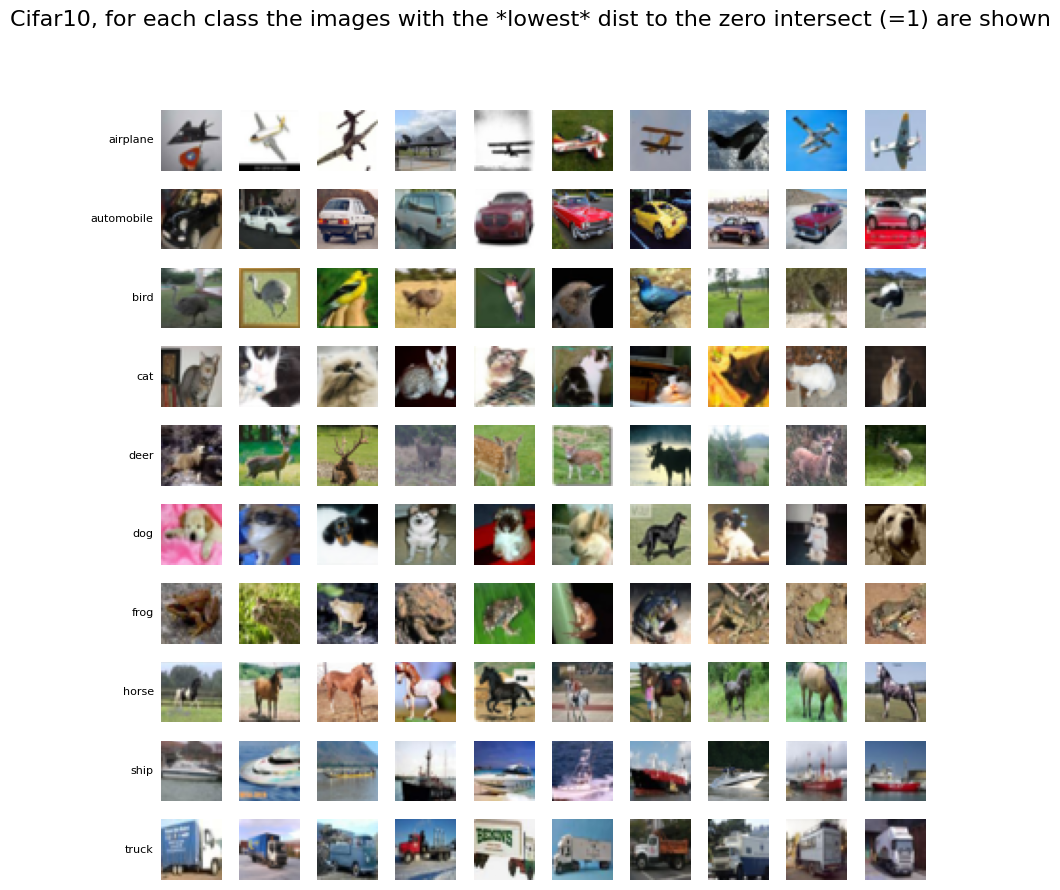

In [14]:
# plot_images_per_class_with_norm_close_to_0_intersect_of_extra_dim(embed_dict_stereo, high_dist=True)
plot_images_per_class_with_norm_close_to_0_intersect_of_extra_dim(embed_dict_stereo)

In [4]:
path = "logs/Balanced-1000/exp_map/version_0/checkpoint/epoch=999.ckpt"
embed_dict_exp_map = get_embeds_for_ckpt(path, cifar10_train)

In [27]:
mean_cos_sim_between_embeddings_with_extreme_norm(embed_dict_exp_map)

high norm mean over classes: 0.87160206
low norm mean over classes: 0.5662774

mean cosine similarity between all 200 datapoints with
highest norm: 0.5039588
lowest norm: 0.48883626



In [28]:
mean_cos_sim_between_embeddings_with_extreme_norm(embed_dict_stereo)

high norm mean over classes: 0.87676495
low norm mean over classes: 0.5235301

mean cosine similarity between all 200 datapoints with
highest norm: 0.785132
lowest norm: 0.42601645



In [29]:
mean_cos_sim_between_embeddings_with_extreme_norm(simclr_embed_dict)

high norm mean over classes: 0.34375745
low norm mean over classes: 0.14942865

mean cosine similarity between all 200 datapoints with
highest norm: 0.17013657
lowest norm: 0.10563901



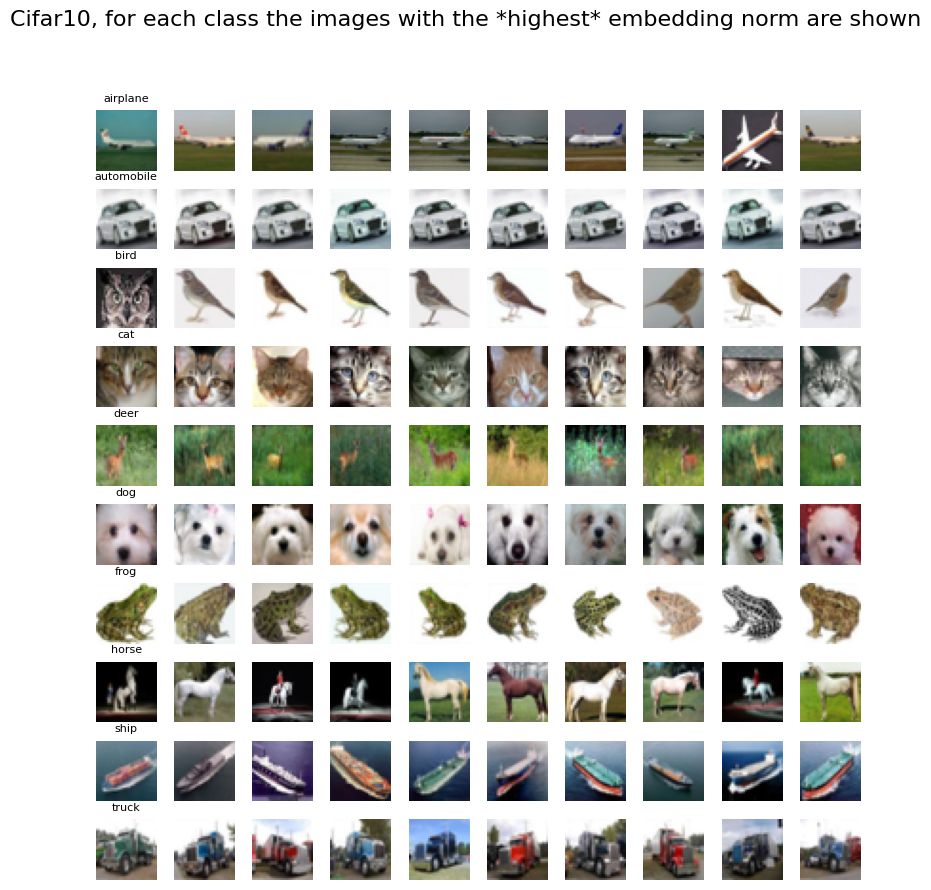

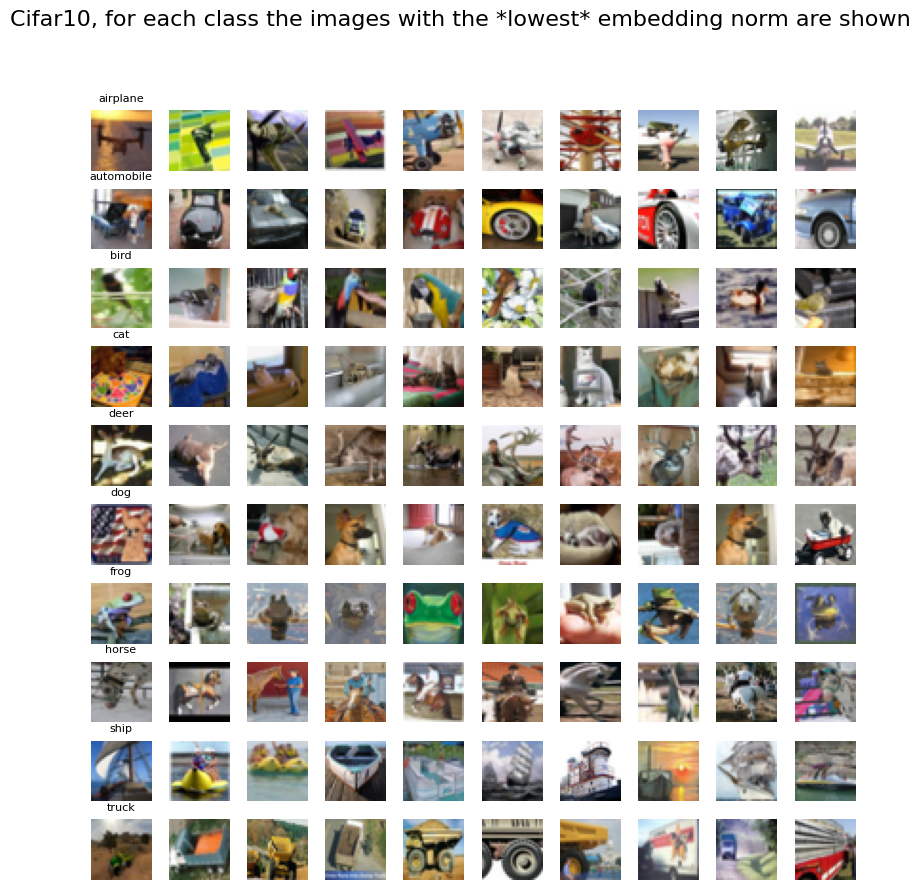

In [3]:
plot_extrem_norm_images_per_class(embed_dict_stereo, high_norm=True)
plot_extrem_norm_images_per_class(embed_dict_stereo)

In [2]:
import numpy as np
with open("logs/Point_tracking-1000/l2/version_0/embed_history.npy", "rb") as f:
    embed_hist = np.load(f, allow_pickle=True)

first norms, min max: 1.9559822 20.456253
last norms, min max: 0.020918356 0.59761083


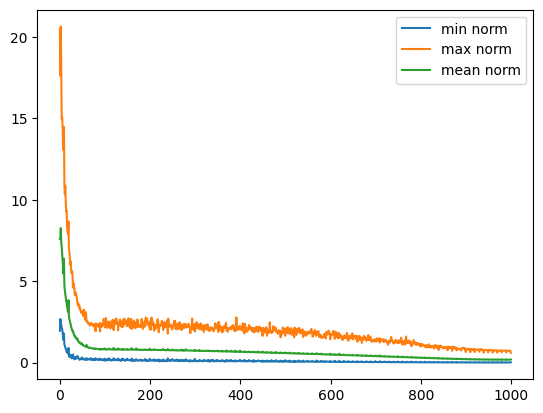

In [49]:
import matplotlib.pyplot as plt

norm_history = embed_hist.item()["norm_history"]

first_norms = embed_hist.item()["norm_history"][0]
last_norms = embed_hist.item()["norm_history"][-1]
print("first norms, min max:", first_norms.min(), first_norms.max())
print("last norms, min max:", last_norms.min(), last_norms.max())

min_norm = []
max_norm = []
mean_norm = []

for norms in norm_history:
    min_norm.append(norms.min())
    max_norm.append(norms.max())
    mean_norm.append(norms.mean())

epochs = list(range(1000))
plt.plot(epochs, min_norm, label="min norm")
plt.plot(epochs, max_norm, label="max norm")
plt.plot(epochs, mean_norm, label="mean norm")
plt.legend()
plt.show()

In [94]:
k = 10
epoch = -1
norm_history = np.vstack(embed_hist.item()["norm_history"])
dist_history = np.vstack(embed_hist.item()["embed_distances_history"])

low_norm_idx = norm_history[epoch].argsort()[:k]
high_norm_idx = norm_history[epoch].argsort()[-k:]
low_norm = norm_history[epoch, low_norm_idx]
high_norm = norm_history[epoch, high_norm_idx]

high_norm_dist = dist_history[:, high_norm_idx].mean(0)
low_norm_dist = dist_history[:, low_norm_idx].mean(0)
high_norm_dist, low_norm_dist

(array([0.5179337 , 0.37187526, 0.39119226, 0.4863303 , 0.5496648 ,
        0.3862186 , 0.48590735, 0.41991243, 0.38401648, 0.5270592 ],
       dtype=float32),
 array([0.8319144 , 0.8038037 , 0.84816086, 0.76600254, 0.8567605 ,
        0.8516959 , 0.89549524, 0.7956433 , 0.7382287 , 0.83266336],
       dtype=float32))

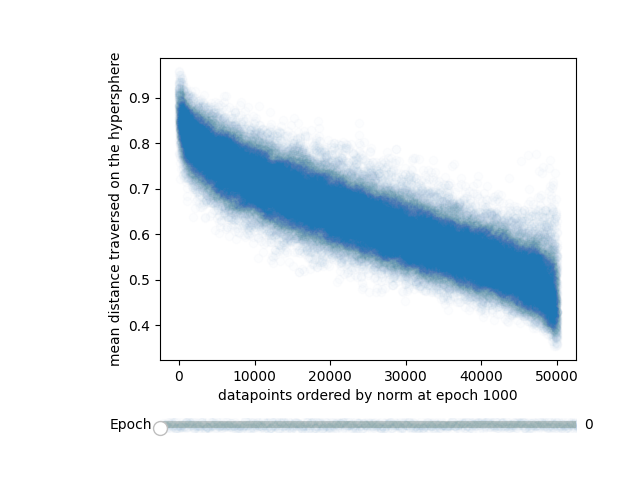

In [160]:
norm_history = np.vstack(embed_hist.item()["norm_history"])
dist_history = np.vstack(embed_hist.item()["embed_distances_history"])

epoch_to_sort_by = 0

sort_idx = norm_history[epoch_to_sort_by].argsort()
# data_points_sorted_by_norm = dist_history[:,sort_idx]
datapoint_position = list(range(norm_history.shape[1]))
dist_by_norm = dist_history.mean(0)[sort_idx]

plt.scatter(datapoint_position, dist_by_norm, alpha=0.01)
plt.show()

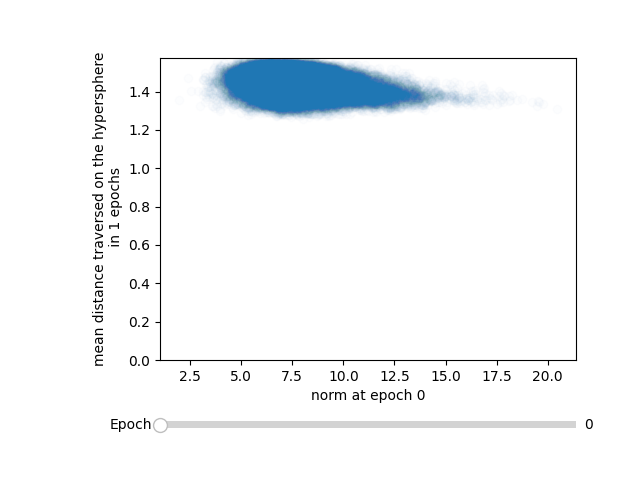

In [220]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Button, Slider


def plot_dist_hist_mean_by_norm(
        norm_history,
        dist_history,
        ):
    n_epochs = norm_history.shape[0]
    epoch_dist = {}
    epoch_norm = {}
    epochs_displayed = list(range(0,n_epochs, 100))
    if epochs_displayed[-1] < n_epochs:
        epochs_displayed.append(n_epochs-1)
    max_norm = 0
    epoch_up_to = {}
    for i in epochs_displayed:
        up_to_epoch = 1 if i == 0 else i
        epoch_up_to[i] = up_to_epoch
        dist_by_norm = np.median(dist_history[:up_to_epoch], 0)
        epoch_dist[i] = dist_by_norm
        epoch_norm[i] = norm_history[i]
        epoch_max_norm = norm_history[i].max()
        if epoch_max_norm > max_norm:
            max_norm = epoch_max_norm
    
    fig = plt.figure()
    gs = fig.add_gridspec(1, hspace=0)
    ax = gs.subplots()
    initial_plot_n = 0
    scatter = ax.scatter(epoch_norm[initial_plot_n], epoch_dist[initial_plot_n], alpha=0.01)
    ax.set_xlabel(f"norm at epoch {initial_plot_n}")
    ax.set_ylabel(f"mean distance traversed on the hypersphere\n in {epoch_up_to[0]} epochs")
    ax.set_ylim((0,epoch_dist[initial_plot_n].max()))
    fig.subplots_adjust(left=0.25, bottom=0.25)
    ax_epoch = fig.add_axes([0.25, 0.1, 0.65, 0.03])
    epoch_slider = Slider(
        ax=ax_epoch,
        label='Epoch',
        valmin=min(epochs_displayed),
        valmax=max(epochs_displayed),
        valinit=initial_plot_n,
        valstep=epochs_displayed
    )
    def update(epoch):
        scatter.set_offsets(np.c_[epoch_norm[epoch], epoch_dist[epoch]])
        ax.set_xlim((0,epoch_norm[epoch].max()))
        ax.set_ylim((0,epoch_dist[epoch].max()))
        ax.set_xlabel(f"norm at epoch {epoch}")
        ax.set_ylabel(f"mean distance traversed on the hypersphere\n in {epoch_up_to[epoch]} epochs")
        fig.canvas.draw_idle()
    epoch_slider.on_changed(update)
    plt.show()

norm_history = np.vstack(embed_hist.item()["norm_history"])
dist_history = np.vstack(embed_hist.item()["embed_distances_history"])
plt.close()
plot_dist_hist_mean_by_norm(norm_history, dist_history)

In [5]:
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.pyplot as plt
import numpy as np
with open("logs/Point_tracking-1000/l2/version_0/embed_history.npy", "rb") as f:
    embed_hist = np.load(f, allow_pickle=True)

norm_history = np.vstack(embed_hist.item()["norm_history"])
dist_history = np.vstack(embed_hist.item()["embed_distances_history"])

n_epochs = norm_history.shape[0]
epoch_dist = {}
epoch_norm = {}
epochs_displayed = list(range(0,n_epochs, 10))
epochs_displayed[0] = 5
if epochs_displayed[-1] < n_epochs:
    epochs_displayed.append(n_epochs-1)
max_norm = 0
epoch_up_to = {}
for i in epochs_displayed:
    up_to_epoch = 1 if i == 0 else i
    epoch_up_to[i] = up_to_epoch
    dist_by_norm = np.median(dist_history[:up_to_epoch], 0)
    epoch_dist[i] = dist_by_norm
    epoch_norm[i] = norm_history[i]
    epoch_max_norm = norm_history[i].max()
    if epoch_max_norm > max_norm:
        max_norm = epoch_max_norm

In [ ]:
dist_history<

array([[1.3451321 , 1.4264889 , 1.4953128 , ..., 1.4347918 , 1.4433417 ,
        1.4630849 ],
       [5.958398  , 5.971856  , 6.7703924 , ..., 7.271215  , 7.2608647 ,
        5.4365387 ],
       [6.1893654 , 5.602433  , 7.9423    , ..., 6.8379173 , 7.810246  ,
        4.2455544 ],
       ...,
       [0.78307116, 0.71822244, 0.88260275, ..., 0.9153211 , 0.74458385,
        0.938461  ],
       [0.7830375 , 0.71812975, 0.8826858 , ..., 0.9153557 , 0.7445729 ,
        0.9385109 ],
       [0.7838196 , 0.7207953 , 0.8840556 , ..., 0.9164591 , 0.7464285 ,
        0.93868214]], shape=(1000, 50000), dtype=float32)

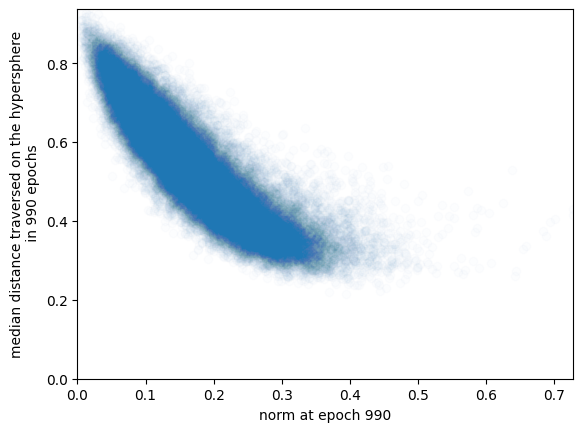

In [6]:
fig = plt.figure()
gs = fig.add_gridspec(1, hspace=0)
ax = gs.subplots()
initial_plot_n = epochs_displayed[0]
scatter = ax.scatter(epoch_norm[initial_plot_n], epoch_dist[initial_plot_n], alpha=0.01)
ax.set_xlabel(f"norm at epoch {initial_plot_n}")
ax.set_ylabel(f"mean distance traversed on the hypersphere\n in {epoch_up_to[initial_plot_n]} epochs")
ax.set_ylim((0,epoch_dist[initial_plot_n].max()))
def animate(i):
    epoch=epochs_displayed[i]
    scatter.set_offsets(np.c_[epoch_norm[epoch], epoch_dist[epoch]])
    ax.set_xlim((0,epoch_norm[epoch].max()))
    ax.set_ylim((0,epoch_dist[epoch].max()))
    ax.set_xlabel(f"norm at epoch {epoch}")
    ax.set_ylabel(f"median distance traversed on the hypersphere\n in {epoch_up_to[epoch]} epochs")
    # fig.canvas.draw_idle()
    return [scatter]

ani = FuncAnimation(fig, animate, interval=1, blit=True, repeat=True, frames=100)
ani.save("median_distance-norm.gif", dpi=300, writer=PillowWriter(fps=5))

In [46]:
from data_utils import cifar10_train
path = "logs/Point_tracking-1000/l2/version_0/checkpoint/epoch=999.ckpt"
simclr_embed_dict = get_embeds_for_ckpt(path, cifar10_train)

In [47]:
init_embed_norms = np.linalg.norm(simclr_embed_dict["projector"], axis=1)
init_embed_norms.min(), init_embed_norms.max()

(np.float32(0.02092341), np.float32(0.5975983))

In [36]:
from lightning_simclr import SimCLR

mod = SimCLR("cifar10")
init_embds = mod.embed_dataset(cifar10_train)

In [44]:
init_embed_norms = np.linalg.norm(init_embds[2], axis=1)
init_embed_norms.min(), init_embed_norms.max()

(np.float32(1.6436198), np.float32(9.257088))

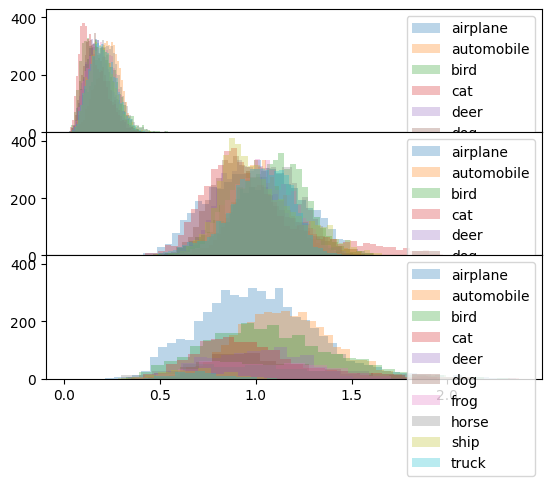

In [ ]:
path = "logs/Balanced-1000/l2/version_0/checkpoint/epoch=999.ckpt"
embed_dict = get_embeds_for_ckpt(path, cifar10_train)
path = "logs/Balanced-1000/stereo/version_0/checkpoint/epoch=999.ckpt"
embed_dict_stereo = get_embeds_for_ckpt(path, cifar10_train)
path = "logs/Balanced-1000/exp_map/version_0/checkpoint/epoch=999.ckpt"
embed_dict_exp_map = get_embeds_for_ckpt(path, cifar10_train)


dict_of_embed_dict = dict(
    l2 = embed_dict,
    # cut = embed_dict_cut,
    # mono = embed_dict_mono,
    stereo = embed_dict_stereo,
    exp_map = embed_dict_exp_map,
    # unba_mono = unba_embed_dict_mono
)

plot_variant_norm_hists(dict_of_embed_dict)
plot_class_norm_hist(dict_of_embed_dict)

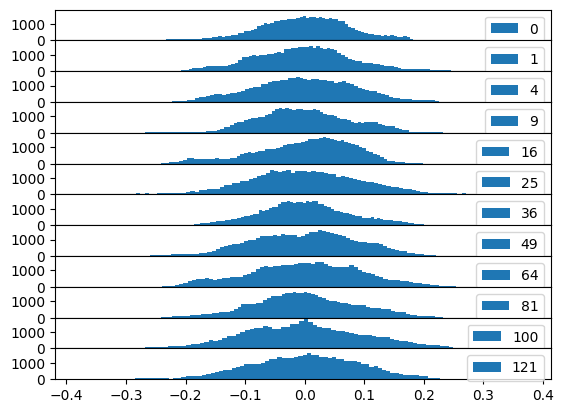

In [111]:
from matplotlib import pyplot as plt
import numpy as np

def plot_hist(embeds, display_mode="show_fist_two"):
    dims_to_show = dict(
        show_fist_two = [0,1],
        show_all = list(range(embeds.shape[1])),
        show_sample = [i**2 for i in range(embeds.shape[1]) if i**2 < embeds.shape[1]]
    )[display_mode]
    
    n_selected = len(dims_to_show)

    fig = plt.figure()
    gs = fig.add_gridspec(n_selected, hspace=0)
    axs = gs.subplots(sharex=True, sharey=True)
    
    for i, dim in enumerate(dims_to_show):
        counts, bins = np.histogram(embeds[:,dim], "auto")
        ax = axs[i]
        ax.stairs(counts, bins, fill=True, label=str(dim))
        ax.legend(loc='upper right')
    plt.show()


embeds = embed_dict["normalized"]
plot_hist(embeds,"show_sample")

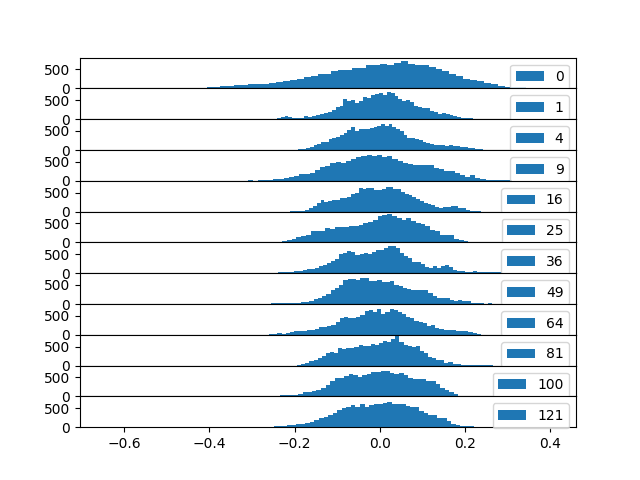

In [ ]:
embeds = embed_dict["normalized"]
display_mode = "show_sample"

dims_to_show = dict(
    show_fist_two = [0,1],
    show_all = list(range(embeds.shape[1])),
    show_sample = [i**2 for i in range(embeds.shape[1]) if i**2 < embeds.shape[1]]
)[display_mode]

n_selected = len(dims_to_show)

fig = plt.figure()
gs = fig.add_gridspec(n_selected, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

for i, dim in enumerate(dims_to_show):
    counts, bins = np.histogram(embeds[:,dim], "auto")
    ax = axs[i]
    ax.stairs(counts, bins, fill=True, label=str(dim))
    ax.legend(loc='upper right')
plt.show()

In [4]:
path = "logs/Unbalanced-1000/l2/version_0/checkpoint/"
epochXembed_dict = get_embeds_for_ckpts(path)

AttributeError: 'SimCLR' object has no attribute 'train_dataset'

In [ ]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Button, Slider

hists = {}
embedding_source = "normalized"
for epoch, embed_dic in simclr_embed_dict.items():
    embeddings = embed_dic[embedding_source]
    hists[epoch] = np.histogram(embeddings[:,0], "auto")

epochs = list(hists.keys())
fig, ax = plt.subplots()
counts, bins = hists[min(epochs)]
hist = ax.stairs(counts, bins, fill=True, label=str(dim))
ax.axvline(0, 0, 1000, color="red")
ax.set_xlabel('Time [s]')

fig.subplots_adjust(left=0.25, bottom=0.25)


ax_epoch = fig.add_axes([0.25, 0.1, 0.65, 0.03])
epoch_slider = Slider(
    ax=ax_epoch,
    label='Epoch',
    valmin=min(epochs),
    valmax=max(epochs),
    valinit=epochs[0],
    valstep=epochs
)
def animate(val):
    hist.set_data(*hists[val])
    fig.canvas.draw_idle()


# register the update function with each slider
epoch_slider.on_changed(animate)

ValueError: too many values to unpack (expected 2)